In [130]:
import cv2
import matplotlib.pyplot as plt


In [131]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

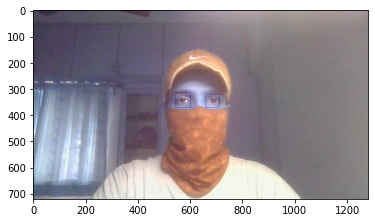

In [132]:
image = cv2.imread('sagar_masked.jpg')
image2 = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray, 1.2, 1)
for (x,y,w,h) in eyes:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0,0,255))
plt.imshow(image)

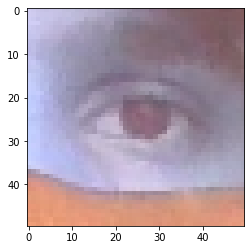

In [133]:
one_eye_list = eyes[0]
x,y,w,h = one_eye_list
one_eye_image = image2[y-20:y+h+20, x-20:x+w+20]
one_eye_image = cv2.resize(one_eye_image, (50,50))
plt.imshow(one_eye_image)


In [134]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

from tensorflow.python.framework import ops
ops.reset_default_graph()
img_size = 50
lr = 1e-3

# Building convolutional convnet
convnet = input_data(shape=[None, img_size, img_size, 3], name='input')
# http://tflearn.org/layers/conv/
# http://tflearn.org/activations/


convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)


convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=lr, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir = 'log')


In [135]:
model.load('gender_detector')

INFO:tensorflow:Restoring parameters from D:\Projects\Internship Trendzlink\Text Detection\CNN\gender_detector


Text(0.5, 1.0, 'Male')

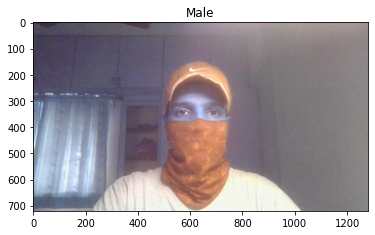

In [136]:
orig = one_eye_image
data = one_eye_image.reshape(img_size,img_size,3)
model_out = model.predict([data])[0]
model_out = model_out.round()
if model_out[0] == 0: str_label='Male'
else: str_label='Female'
        
plt.imshow(image2,cmap='gray')
plt.title(str_label)